# 概述

### 正则化


* 正则化结构风险最小化的实现，是在经验风险上增加一个正则项，模型越复杂，正则化值就越大。

* 正则化形式：

$$
\min_{f\in F}\frac{1}{N}\sum_{i=1}^{N}L(x_{i} ,f(x_{i}))+\lambda J(f)
$$

其中第一项是经验风险，第二项是正则化项，$\lambda$>=0。`J(f)`是参数向量`w`的`L2`或`L1`范数。

### 交叉验证

* 简单交叉验证
    * 首先随机将已给数据分为两部分，一部分作为训练集，一部分作为测试集；在训练集下训练模型，在测试集上评价模型的测试误差，选出测试误差最小的模型。

* S折交叉验证
    * 首先随机地将已给数据切分为S个互不相交的大小相同的子集；然后利用S-1个子集的数据训练模型，利用余下的子集测试模型；将这一过程对可能的S种选择重复进行；最后选出S次评测中平均测试误差最小的模型。

* 留一交叉验证
    * S折交叉验证的特殊情形是S=N，称为留一交叉验证，在数据缺乏的情况下使用，N是给定数据集的大小。

### 泛化误差

* 用已学到的模型对未知数据预测的误差。

### 生成模型：给定输入X产生输出Y的生成关系。

* 朴素贝叶斯、隐马尔可夫模型

### 判别模型：给定输入X，预测输出Y。

* k近邻法、感知机、决策树、logistic regression、最大熵模型、SVM、提升方法、条件随机场

#### 生成方法和判别方法的特点

* `生成方法`：可以还原出联合概率分布$P(X,Y)$，学习收敛速度快。
* `判别方法`：直接学习的是条件概率$P(Y|X)$或决策函数$f(X)$，学习的准确率更高。

### 分类问题

* 评价指标
    * 精确率
    $$    P=\frac{TP}{TP+FP}    $$
    * 召回率
    $$R=\frac{TP}{TP+FN}$$

* 分类方法

* k近邻、感知机、朴素贝叶斯、决策树、logistics regression、SVM、提升方法、贝叶斯网络、神经网络

### 代码实现一个最小二乘法

In [2]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [4]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [5]:
# 10个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

In [13]:
def fitting(M=0):
    '''
    M为多项式的次数
    '''
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('parameters:', p_lsq[0])
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

### M=0

parameters: [-0.01746884]


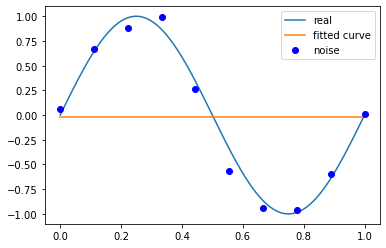

In [15]:
p_lsq_0 = fitting(0)

### M=1

parameters: [-1.37159094  0.66832664]


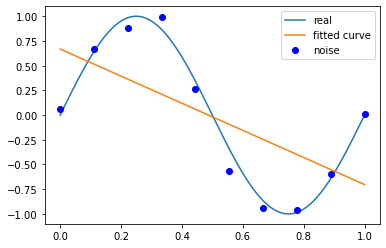

In [26]:
p_lsq_1 = fitting(1)

### M=3

parameters: [ 2.12266133e+01 -3.13205661e+01  1.01898807e+01  1.15085227e-02]


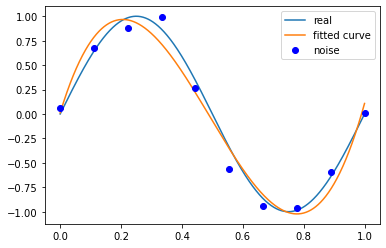

In [27]:
p_lsq_3 = fitting(3)

### M=9

parameters: [ 3.32321470e+03 -1.90863772e+04  4.55751501e+04 -5.88252149e+04
  4.44800596e+04 -1.98696966e+04  5.01859791e+03 -6.53288892e+02
  3.75032348e+01  6.08344236e-02]


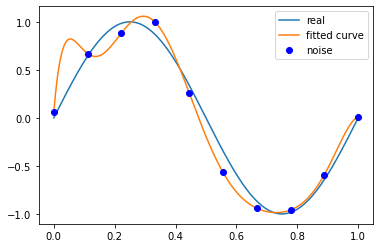

In [22]:
p_lsq_9 = fitting(9)

* 当次数过高时，出现了过拟合现象，需要加入正则化，降低过拟合。

In [23]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5 * regularization * np.square(p)))  # L2范数
    return ret

In [24]:
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

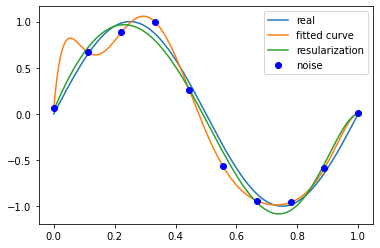

In [25]:
 #可视化
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_0[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='resularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()